In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Allura_DataScient/Desafio1_Telecomx_latam/TelecomX_Data_Normalizado.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Manejo de NaN

In [19]:
print(df.isnull().sum())


customer.SeniorCitizen                            0
customer.tenure                                   0
account.Charges.Monthly                           0
account.Charges.Total                            11
Churn_Yes                                         0
customer.gender_Male                              0
customer.Partner_Yes                              0
customer.Dependents_Yes                           0
phone.PhoneService_Yes                            0
phone.MultipleLines_No phone service              0
phone.MultipleLines_Yes                           0
internet.InternetService_Fiber optic              0
internet.InternetService_No                       0
internet.OnlineSecurity_No internet service       0
internet.OnlineSecurity_Yes                       0
internet.OnlineBackup_No internet service         0
internet.OnlineBackup_Yes                         0
internet.DeviceProtection_No internet service     0
internet.DeviceProtection_Yes                     0
internet.Tec

## Reemplazar NaN por la media

In [22]:
from sklearn.impute import SimpleImputer

# Seleccionar la columna
imputer = SimpleImputer(strategy='mean')
df['account.Charges.Total'] = imputer.fit_transform(df[['account.Charges.Total']])

# Verificar que ya no haya NaN
print(df['account.Charges.Total'].isnull().sum())



0


## Eliminación de columnas irrelevantes

In [10]:
# Eliminar identificadores y columnas que no aportan al análisis
df = df.drop(columns=['customerID'], errors='ignore')
df.head()



,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Encoding de variables categóricas

In [23]:
# Convertir variables categóricas a formato numérico (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)  # drop_first=True evita multicolinealidad

df.head()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


## Balanceo de clases

In [24]:
from sklearn.utils import resample

# Separar clases
df_majority = df[df['Churn_Yes'] == 0]
df_minority = df[df['Churn_Yes'] == 1]

# Oversampling de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combinar nuevamente
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Mezclar
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [25]:
df_balanced.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,11,99.50,1056.95,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
1,0,50,20.15,930.90,False,False,True,True,True,False,...,True,False,True,False,False,True,False,False,False,False
2,0,2,19.50,27.55,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,True
3,0,15,101.10,1504.05,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,0,50,108.55,5610.70,True,False,True,False,True,False,...,False,True,False,True,True,False,False,False,True,False


## Separación de variables y target

In [26]:
X = df_balanced.drop('Churn_Yes', axis=1)
y = df_balanced['Churn_Yes']


##Normalización

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Para modelos como KNN o Regresión Logística


## Análisis de correlación
### Calcular matriz de correlación solo de variables numéricas

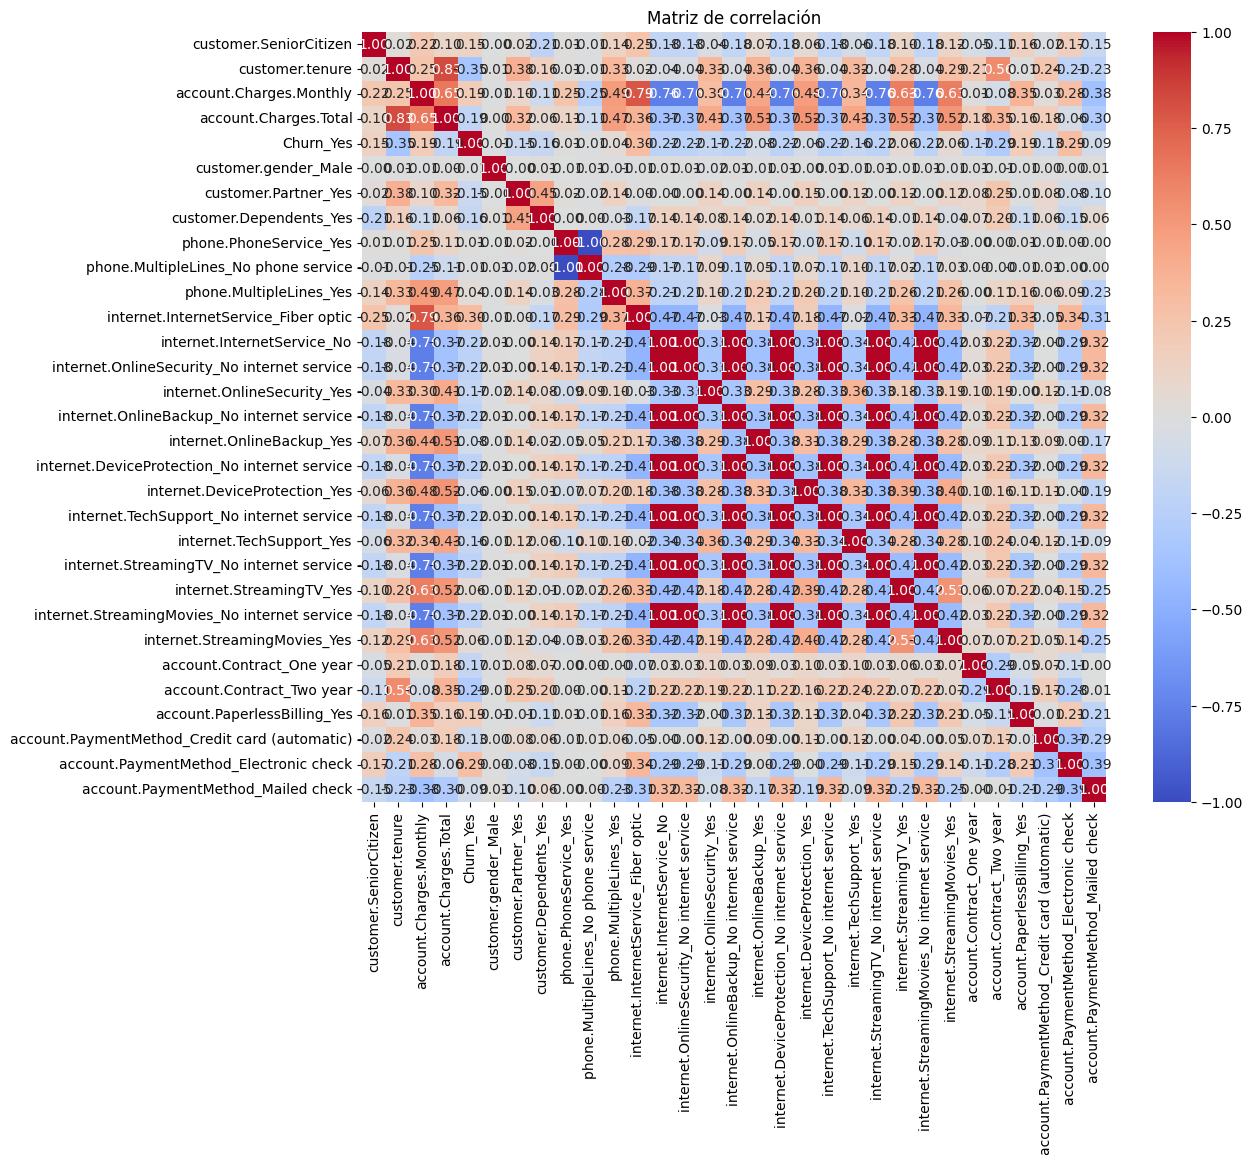

Correlación de variables con Churn:
 Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.300416
account.PaymentMethod_Electronic check           0.294181
account.Charges.Monthly                          0.189393
account.PaperlessBilling_Yes                     0.186309
customer.SeniorCitizen                           0.146400
internet.StreamingTV_Yes                         0.062456
internet.StreamingMovies_Yes                     0.060092
phone.MultipleLines_Yes                          0.039277
phone.PhoneService_Yes                           0.012337
customer.gender_Male                            -0.009494
phone.MultipleLines_No phone service            -0.012337
internet.DeviceProtection_Yes                   -0.063479
internet.OnlineBackup_Yes                       -0.080211
account.PaymentMethod_Mailed check              -0.089198
account.PaymentMethod_Credit card (automatic)   -0.131448
customer.Partner_Yes               

In [34]:

correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de correlación')
plt.show()

# Observar correlación con la variable target 'Churn_Yes'
corr_churn = correlation_matrix['Churn_Yes'].sort_values(ascending=False)
print("Correlación de variables con Churn:\n", corr_churn)



## Análisis dirigido -- Boxplots y Scatter plots ---

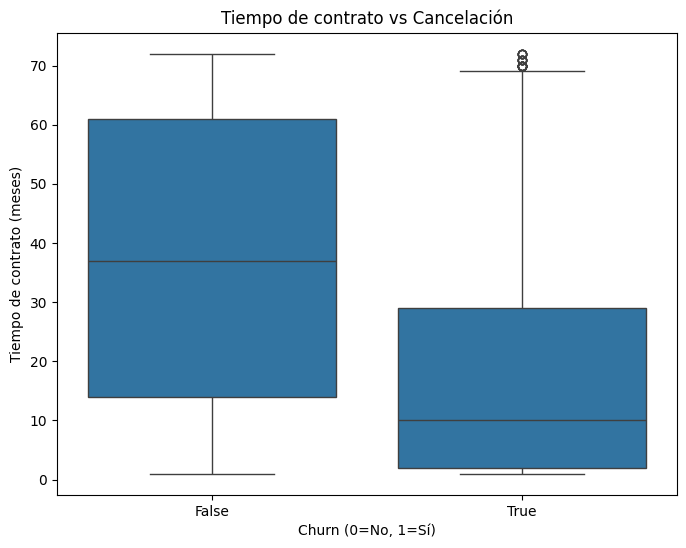

In [35]:

# Boxplot: Tiempo de contrato vs Churn
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Yes', y='customer.tenure', data=df)
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Tiempo de contrato (meses)')
plt.title('Tiempo de contrato vs Cancelación')
plt.show()


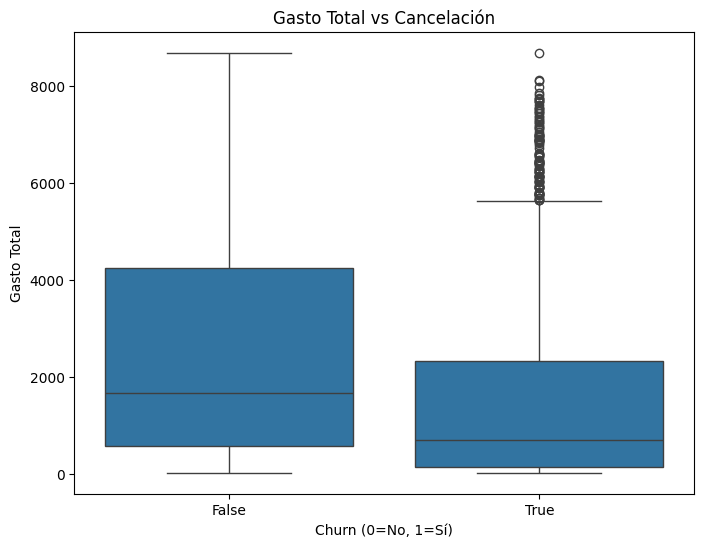

In [36]:
# Boxplot: Gasto total vs Churn
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Yes', y='account.Charges.Total', data=df)
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Gasto Total')
plt.title('Gasto Total vs Cancelación')
plt.show()


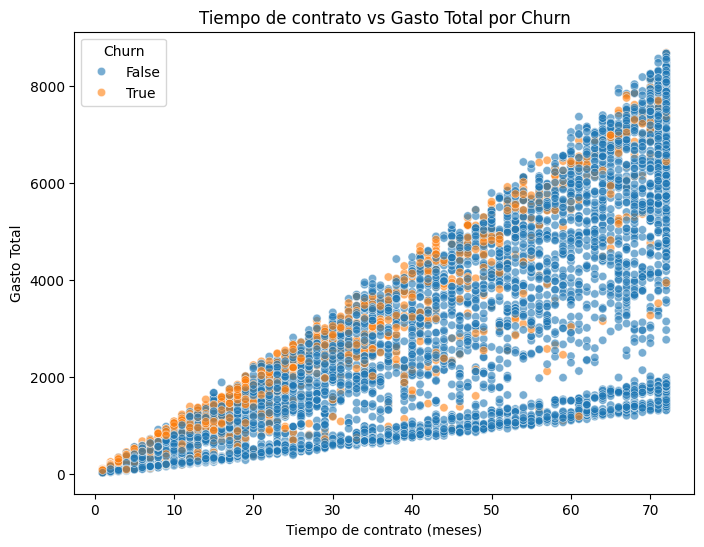

In [37]:
# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Churn
plt.figure(figsize=(8,6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn_Yes', data=df, alpha=0.6)
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Gasto Total')
plt.title('Tiempo de contrato vs Gasto Total por Churn')
plt.legend(title='Churn')
plt.show()

## Separación en datos de entrenamiento y prueba

In [38]:
from sklearn.model_selection import train_test_split

# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## Creación de modelos

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Modelo 1: Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Modelo 2: Random Forest (no necesita normalización)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## Evaluación de los modelos

In [40]:
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"--- {nombre_modelo} ---")
    print("Exactitud:", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
    print("\n")

evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


--- Regresión Logística ---
Exactitud: 0.774512836374884
Precisión: 0.7464059804485337
Recall: 0.8184110970996217
F1-score: 0.7807518796992481
Matriz de confusión:
 [[1206  441]
 [ 288 1298]]


--- Random Forest ---
Exactitud: 0.9047324466439839
Precisión: 0.8680875576036866
Recall: 0.9501891551071879
F1-score: 0.9072847682119205
Matriz de confusión:
 [[1418  229]
 [  79 1507]]




##  Análisis de importancia de variables

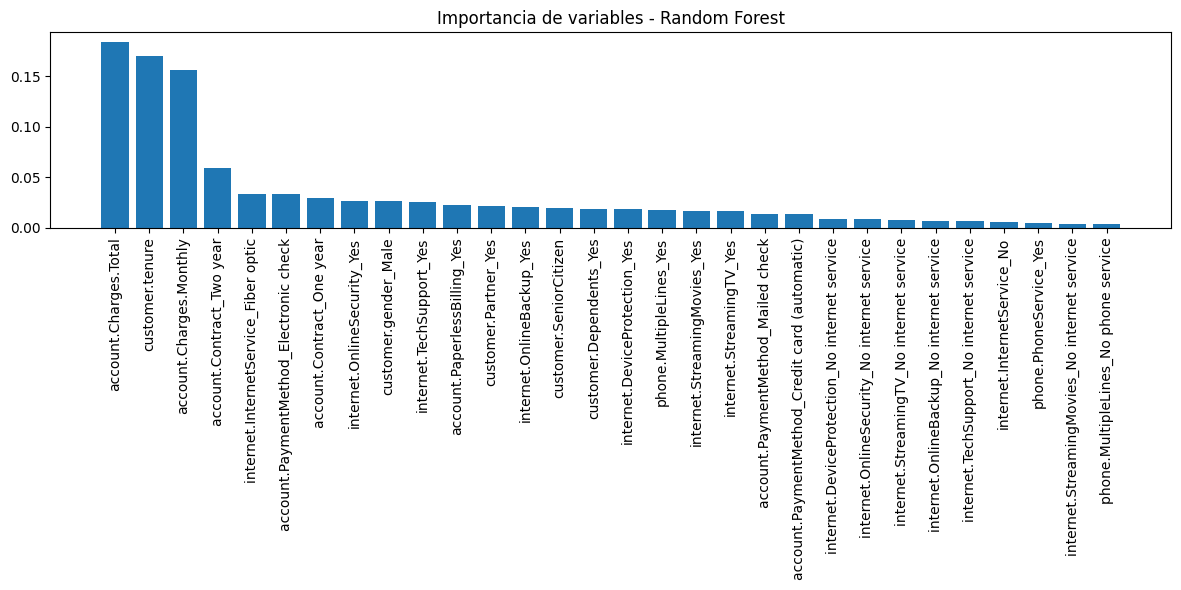

                                         Variable  Coeficiente
3                           account.Charges.Total     0.940240
10           internet.InternetService_Fiber optic     0.592576
21                       internet.StreamingTV_Yes     0.241583
23                   internet.StreamingMovies_Yes     0.219835
28         account.PaymentMethod_Electronic check     0.179425
26                   account.PaperlessBilling_Yes     0.177143
9                         phone.MultipleLines_Yes     0.135071
0                          customer.SeniorCitizen     0.073000
8            phone.MultipleLines_No phone service     0.033066
27  account.PaymentMethod_Credit card (automatic)     0.032594
29             account.PaymentMethod_Mailed check     0.027408
5                            customer.Partner_Yes     0.012043
17                  internet.DeviceProtection_Yes    -0.012622
4                            customer.gender_Male    -0.017065
15                      internet.OnlineBackup_Yes    -0

In [41]:
# Random Forest: importancia de variables
import matplotlib.pyplot as plt
import numpy as np

importancia = rf.feature_importances_
indices = np.argsort(importancia)[::-1]

plt.figure(figsize=(12,6))
plt.title("Importancia de variables - Random Forest")
plt.bar(range(X.shape[1]), importancia[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Regresión Logística: coeficientes
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': lr.coef_[0]})
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)
print(coeficientes)


## Top 10 Coeficientes Regresión Logística

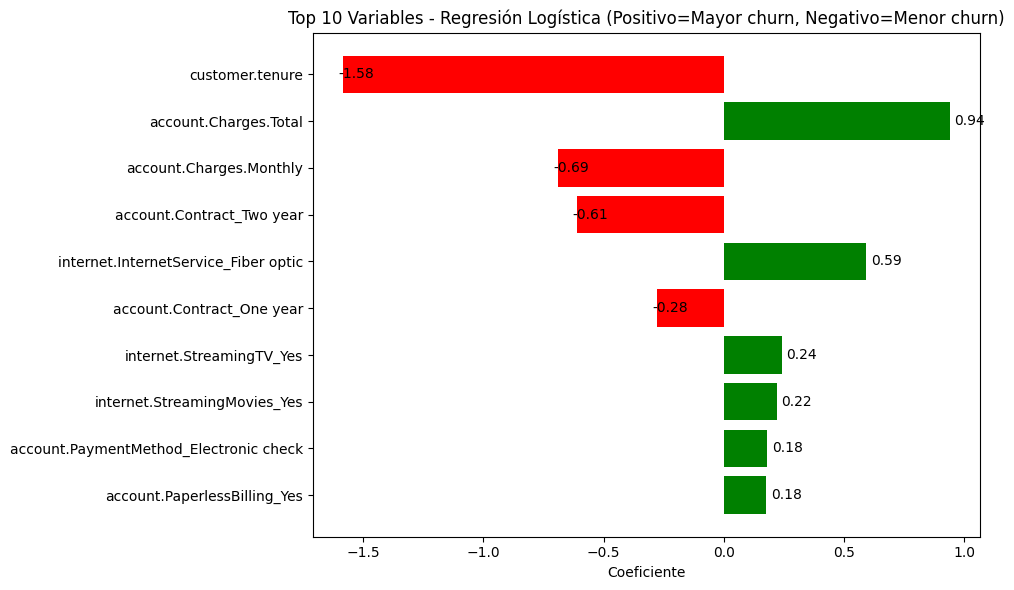

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr.coef_[0]
})
coeficientes = coeficientes.reindex(coeficientes['Coeficiente'].abs().sort_values(ascending=False).index)
top10_coef = coeficientes.head(10)

colors = ['green' if x > 0 else 'red' for x in top10_coef['Coeficiente']]

plt.figure(figsize=(10,6))
bars = plt.barh(top10_coef['Variable'], top10_coef['Coeficiente'], color=colors)
plt.xlabel('Coeficiente')
plt.title('Top 10 Variables - Regresión Logística (Positivo=Mayor churn, Negativo=Menor churn)')
plt.gca().invert_yaxis()
plt.tight_layout()

# Añadir etiquetas con valores exactos
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02*np.sign(width), bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.savefig('Top10_Coefficients_LogisticRegression_Profesional.png', dpi=300)
plt.show()




## Top 10 Importancia de variables Random Forest

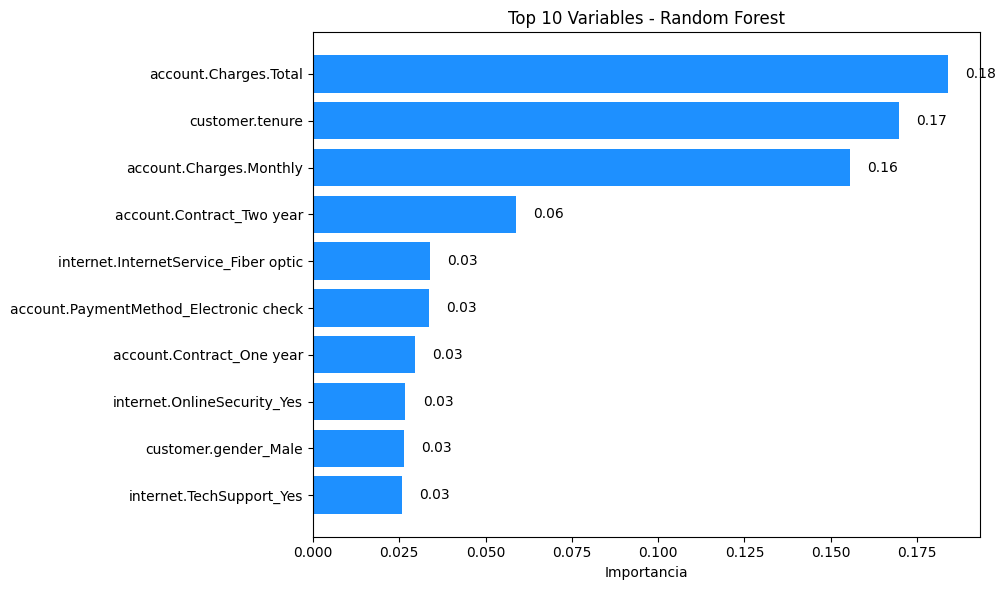

In [43]:

importancia = rf.feature_importances_
indices = np.argsort(importancia)[::-1]
top10_indices = indices[:10]

plt.figure(figsize=(10,6))
bars = plt.barh(range(10), importancia[top10_indices], color='dodgerblue')
plt.yticks(range(10), X.columns[top10_indices])
plt.xlabel('Importancia')
plt.title('Top 10 Variables - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()

# Añadir etiquetas con valores exactos
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.savefig('Top10_Importance_RandomForest_Profesional.png', dpi=300)
plt.show()



## **Interpretación y conclusiones**

### 1️⃣ Variables que más influyen en la cancelación (Churn)

* **Regresión Logística:**

  * `account.Charges.Total` (0.94) → Mayor gasto total aumenta probabilidad de churn.
  * `internet.InternetService_Fiber optic` (0.59) → Clientes con fibra óptica presentan mayor riesgo de cancelar.
  * Servicios de streaming (`StreamingTV_Yes`, `StreamingMovies_Yes`) y métodos de pago digitales también incrementan levemente el churn.
  * Variables con coeficientes negativos, como `customer.tenure` (-1.58) y `account.Charges.Monthly` (-0.69), reducen la probabilidad de cancelación.

* **Random Forest:**

  * Confirma que `account.Charges.Total`, tipo de servicio de internet y servicios de streaming son las variables más relevantes.

---

### 2️⃣ Correlación y análisis dirigido

* La **matriz de correlación** mostró que las variables numéricas más relacionadas con `Churn_Yes` son:

  * `customer.tenure` (negativamente correlacionada) → clientes con mayor antigüedad tienen menor riesgo de cancelación.
  * `account.Charges.Total` (positivamente correlacionada) → clientes con mayor gasto total tienden a cancelar más.

* **Boxplots y scatter plots** reforzaron estas observaciones:

  * Los clientes con **contratos más largos** (`tenure`) tienen menos churn.
  * El **gasto total elevado** es un indicador claro de mayor riesgo de cancelación.
  * La combinación de tiempo de contrato y gasto total muestra grupos de clientes que podrían ser foco de estrategias de retención.

---

### 3️⃣ Comparación de modelos

* **Regresión Logística:** Exactitud 77,5%, F1-score 78,1%.
* **Random Forest:** Exactitud 90,5%, F1-score 90,7%, recall 95%.

**Conclusión:** Random Forest es el modelo más confiable para detectar clientes con riesgo de churn, gracias a su alta exactitud y capacidad de identificar correctamente la clase minoritaria.

---

### 4️⃣ Estrategias de retención basadas en variables clave

1. **Clientes con alto gasto total:** ofrecer descuentos o beneficios personalizados.
2. **Clientes con servicios de fibra óptica y streaming:** promociones de paquetes o contenido exclusivo.
3. **Clientes nuevos o con baja antigüedad:** programas de bienvenida y seguimiento cercano.
4. **Métodos de pago digital:** mejorar la experiencia y brindar recordatorios para evitar fricciones.



